# question 1

In [6]:
import pandas as pd

# Step 1: Load the dataset

df = pd.read_csv('teen_phone_addiction_dataset.csv')

# Step 2: Display shape and data types
print("📐 DataFrame Shape:", df.shape)
print("\n📊 Data Types:\n", df.dtypes)

# Step 3: Check for duplicate records
duplicates_count = df.duplicated().sum()
print(f"\n🔍 Duplicate Records Found: {duplicates_count}")

# Remove duplicates if any
df = df.drop_duplicates()

# Step 4: Check for missing/null values before filling
null_counts_before = df.isnull().sum()
print("\n❌ Missing/Null Values (Before Filling):\n", null_counts_before[null_counts_before > 0])

# Fill missing values with the median (only for numeric columns)
df = df.fillna(df.median(numeric_only=True))

# Step 5: Check for missing/null values after filling
null_counts_after = df.isnull().sum()
print("\n✅ Missing/Null Values (After Filling):\n", null_counts_after[null_counts_after > 0])

# Optional: Save the cleaned dataset
# df.to_csv('/mnt/data/cleaned_teen_phone_addiction_dataset.csv', index=False)


📐 DataFrame Shape: (3000, 25)

📊 Data Types:
 ID                          int64
Name                       object
Age                         int64
Gender                     object
Location                   object
School_Grade               object
Daily_Usage_Hours         float64
Sleep_Hours               float64
Academic_Performance        int64
Social_Interactions         int64
Exercise_Hours            float64
Anxiety_Level               int64
Depression_Level            int64
Self_Esteem                 int64
Parental_Control            int64
Screen_Time_Before_Bed    float64
Phone_Checks_Per_Day        int64
Apps_Used_Daily             int64
Time_on_Social_Media      float64
Time_on_Gaming            float64
Time_on_Education         float64
Phone_Usage_Purpose        object
Family_Communication        int64
Weekend_Usage_Hours       float64
Addiction_Level           float64
dtype: object

🔍 Duplicate Records Found: 0

❌ Missing/Null Values (Before Filling):
 Daily_Usage_Hours 

# question 2

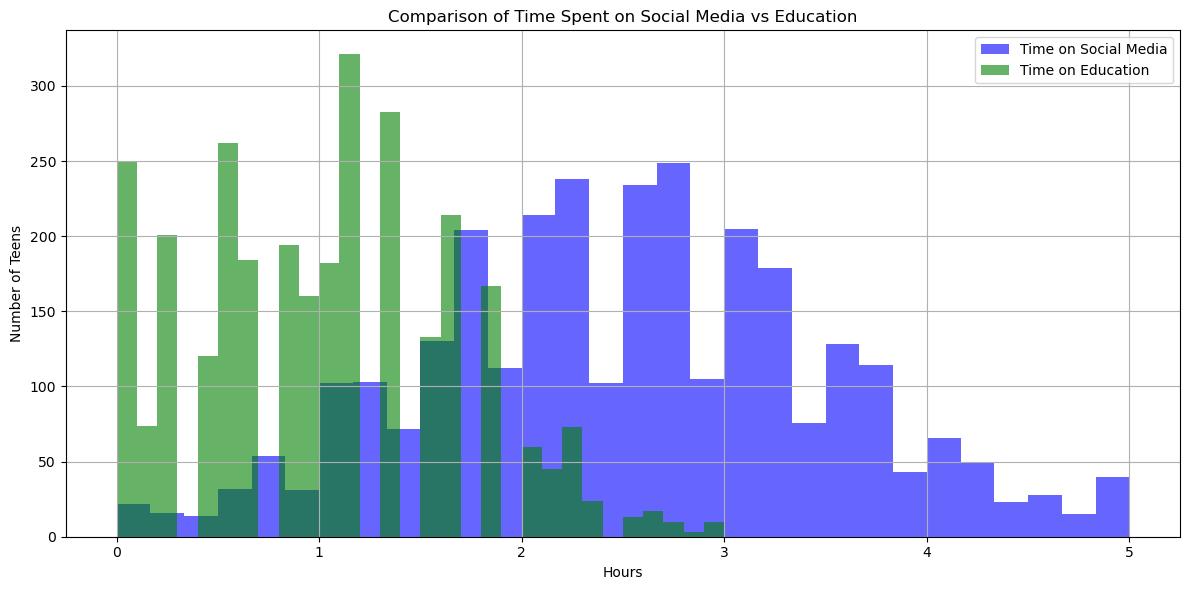

(2.5, 1.0)

In [9]:
import matplotlib.pyplot as plt

# Step 1: Plot side-by-side histograms
plt.figure(figsize=(12, 6))

# Histogram for Time on Social Media
plt.hist(df['Time_on_Social_Media'], bins=30, alpha=0.6, label='Time on Social Media', color='blue')

# Histogram for Time on Education
plt.hist(df['Time_on_Education'], bins=30, alpha=0.6, label='Time on Education', color='green')

plt.title('Comparison of Time Spent on Social Media vs Education')
plt.xlabel('Hours')
plt.ylabel('Number of Teens')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Calculate the median for both
median_social_media = df['Time_on_Social_Media'].median()
median_education = df['Time_on_Education'].median()

median_social_media, median_education


# question 3

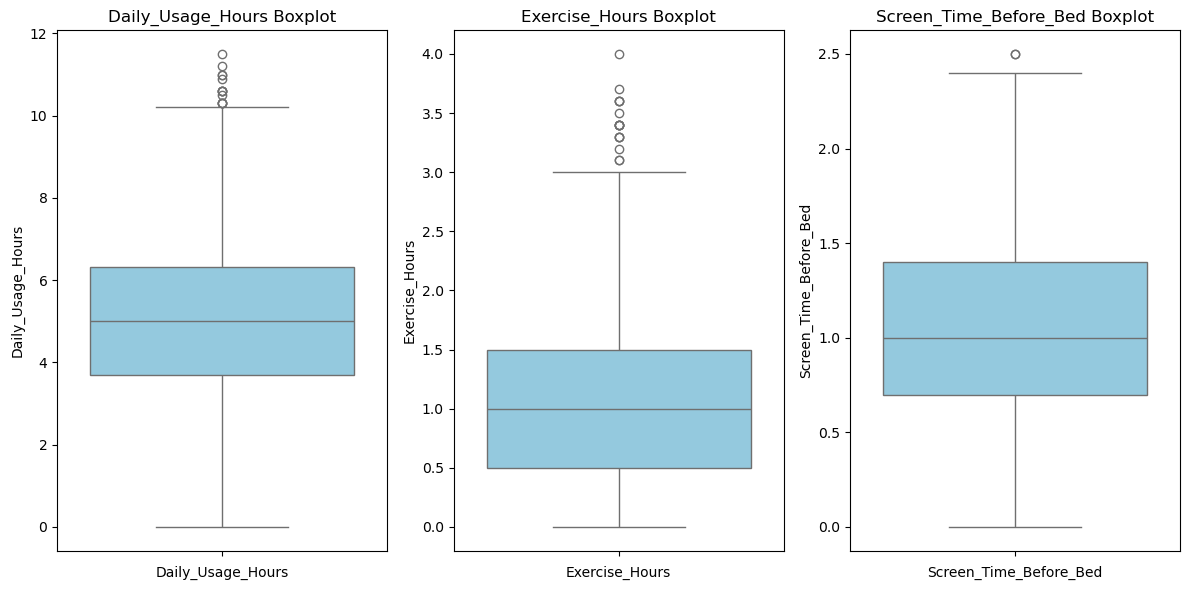

,ID,Name,Daily_Usage_Hours,Exercise_Hours,Screen_Time_Before_Bed
227,228,Michael Hopkins,10.6,2.8,1.4
582,583,Julia Rogers,10.5,2.2,1.0
710,711,Pamela Johnson,11.0,0.4,2.1
881,882,Bridget Santos,10.6,0.2,0.5
1210,1211,Jack Foster,10.3,2.8,0.9
1549,1550,Thomas Mckinney,10.3,0.0,0.2
1665,1666,Brian Pierce,10.9,1.9,1.2
1731,1732,Patrick Adams,10.6,0.4,0.3
2400,2401,Lisa Gonzalez,11.2,1.5,0.9
2622,2623,Deanna Heath,10.3,0.4,1.0


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define a function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers


# Columns to check
columns_to_check = ['Daily_Usage_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed']

# Detect outliers for each column
outliers_dict = {col: detect_outliers_iqr(df, col) for col in columns_to_check}

# Combine all outlier records (union, not intersection)
combined_outliers = pd.concat(outliers_dict.values()).drop_duplicates()

# Plot boxplots for each column
plt.figure(figsize=(12, 6))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Show the outlier records with relevant columns
display(combined_outliers[['ID', 'Name'] + columns_to_check])


# question 4

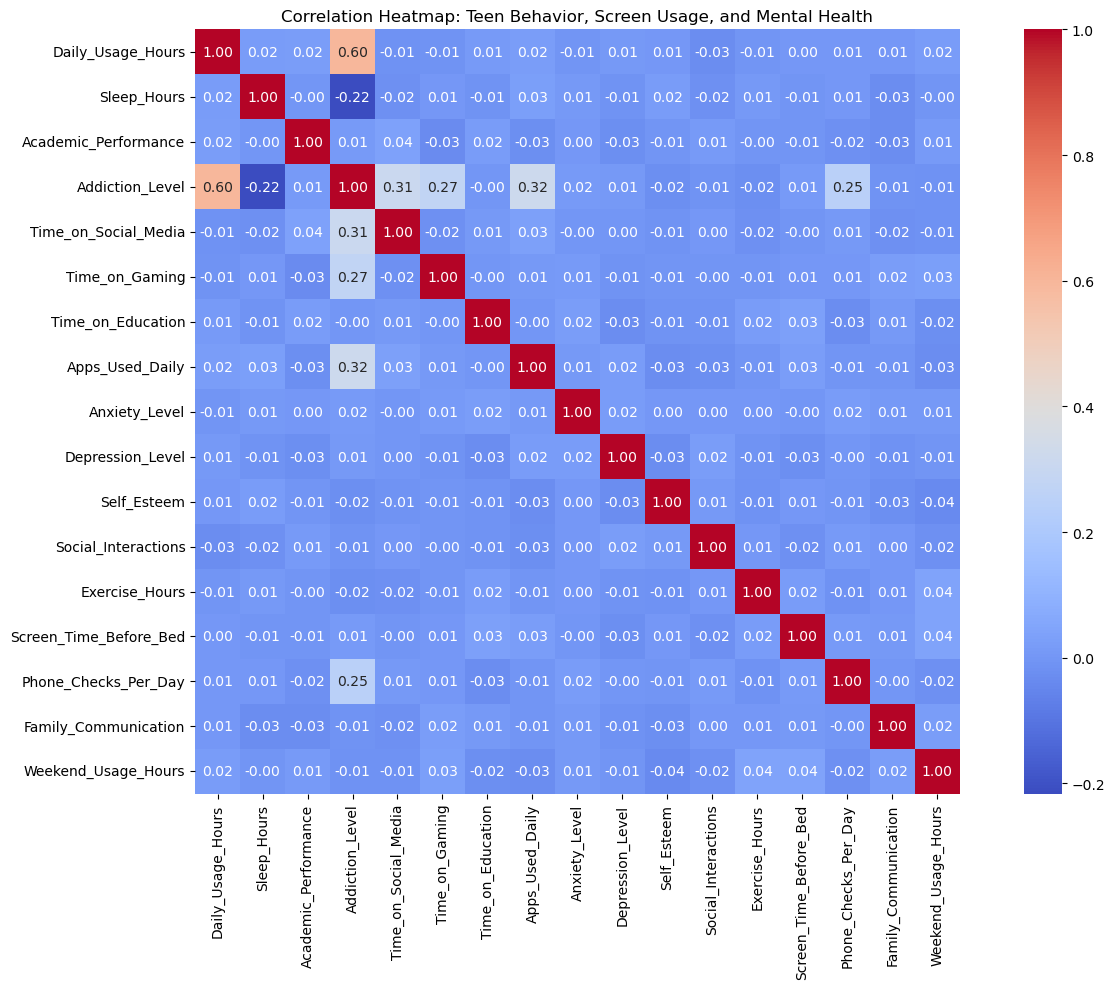

(Daily_Usage_Hours  Addiction_Level      0.6005
 Addiction_Level    Daily_Usage_Hours    0.6005
 dtype: float64,
 Series([], dtype: float64))

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected numeric columns
selected_columns = [
    'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Addiction_Level', 'Time_on_Social_Media',
    'Time_on_Gaming', 'Time_on_Education', 'Apps_Used_Daily', 'Anxiety_Level', 'Depression_Level',
    'Self_Esteem', 'Social_Interactions', 'Exercise_Hours', 'Screen_Time_Before_Bed',
    'Phone_Checks_Per_Day', 'Family_Communication', 'Weekend_Usage_Hours'
]

# Compute the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Heatmap: Teen Behavior, Screen Usage, and Mental Health')
plt.tight_layout()
plt.show()

# Find strong positive and negative correlations
strong_positive = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix < 1.0)].stack().sort_values(ascending=False)
strong_negative = correlation_matrix[(correlation_matrix < -0.4)].stack().sort_values()

strong_positive[:2], strong_negative[:2]  # Show top 2 strong positive and negative correlations


# question 5

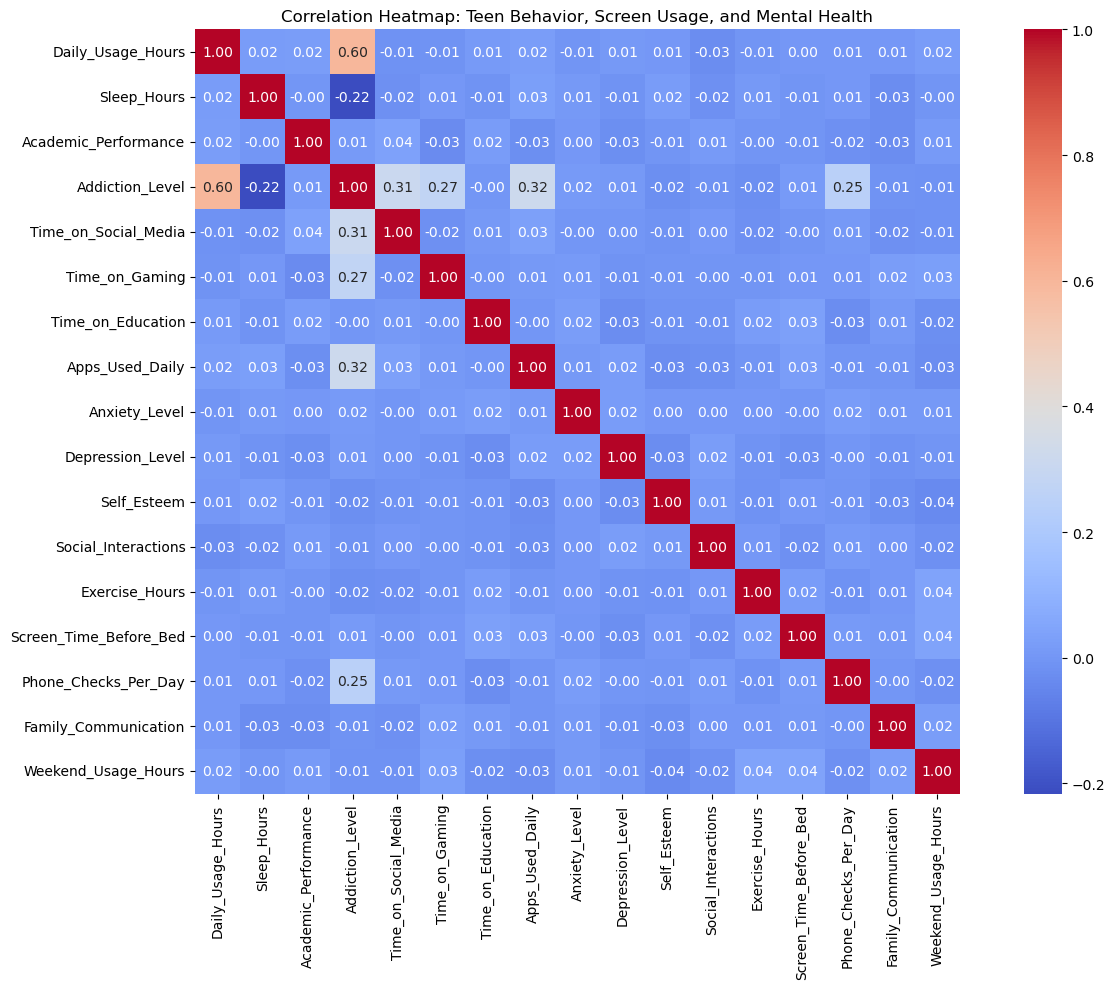

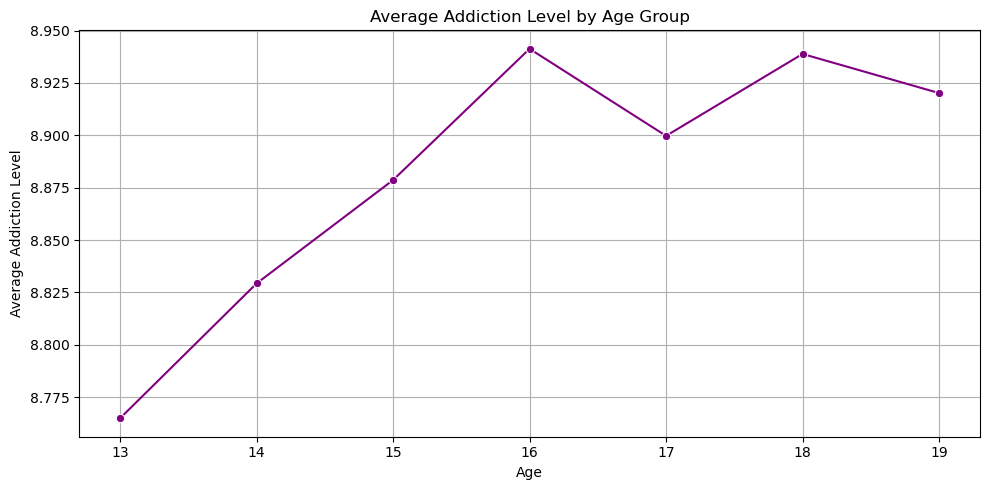

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Selected numeric columns
selected_columns = [
    'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Addiction_Level', 'Time_on_Social_Media',
    'Time_on_Gaming', 'Time_on_Education', 'Apps_Used_Daily', 'Anxiety_Level', 'Depression_Level',
    'Self_Esteem', 'Social_Interactions', 'Exercise_Hours', 'Screen_Time_Before_Bed',
    'Phone_Checks_Per_Day', 'Family_Communication', 'Weekend_Usage_Hours'
]

# Compute the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Correlation Heatmap: Teen Behavior, Screen Usage, and Mental Health')
plt.tight_layout()
plt.show()

# Find strong positive and negative correlations
strong_positive = correlation_matrix[(correlation_matrix > 0.5) & (correlation_matrix < 1.0)].stack().sort_values(ascending=False)
strong_negative = correlation_matrix[(correlation_matrix < -0.4)].stack().sort_values()

strong_positive[:2], strong_negative[:2]  # Show top 2 strong positive and negative correlations

# Plot average addiction level by age group
age_addiction = df.groupby('Age')['Addiction_Level'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=age_addiction, x='Age', y='Addiction_Level', marker='o', color='purple')
plt.title('Average Addiction Level by Age Group')
plt.xlabel('Age')
plt.ylabel('Average Addiction Level')
plt.grid(True)
plt.tight_layout()
plt.show()
